In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.signal
import cv2

In [2]:
 def cv2_imshow(image):
    # developed by Kanishke Gamagedara, udpated by MAE6292
    plt.figure(dpi=200)
    mode = len(np.shape(image))
    if mode==3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    elif mode==2:
        plt.imshow(image, cmap='gray')
    else:
        print('Unsuported image size')
    plt.xticks([]), plt.yticks([])
    plt.axis('off')


[ WARN:0@0.070] global /io/opencv_contrib/modules/xfeatures2d/misc/python/shadow_sift.hpp (13) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


1431
1431


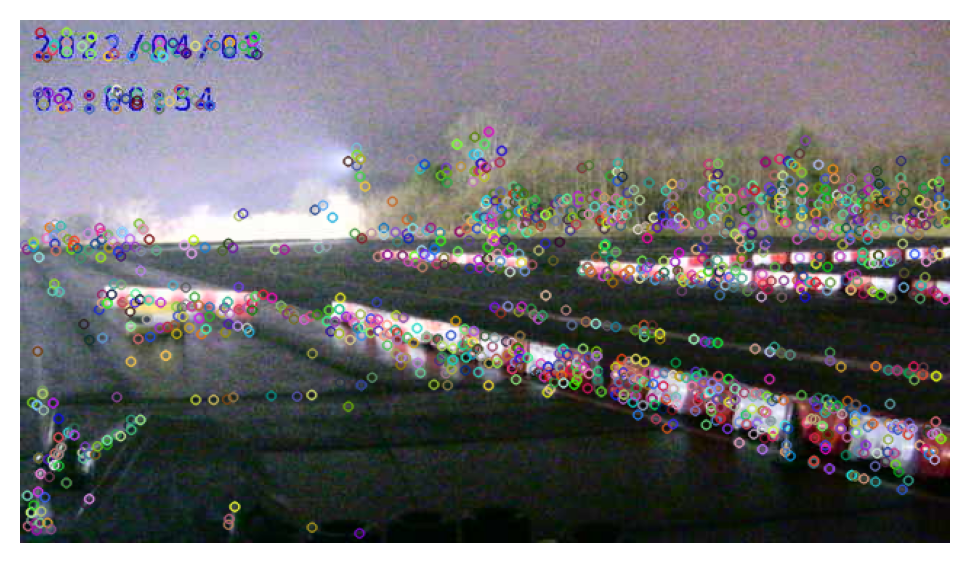

In [3]:
img_ = cv2.imread('PTZImages/image1.jpeg')

img1 = cv2.cvtColor(img_,cv2.COLOR_BGR2GRAY)

img = cv2.imread('PTZImages/image2.jpeg')

img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1,None)

kp2, des2 = sift.detectAndCompute(img2,None)

cv2_imshow(cv2.drawKeypoints(img_,kp1,None))

print(len(kp1))
print(len(des1))





284


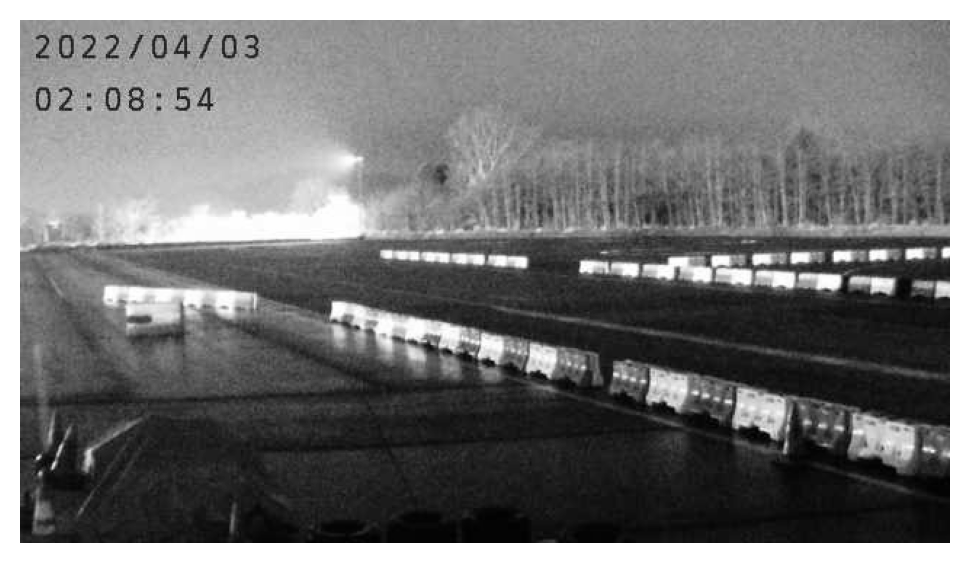

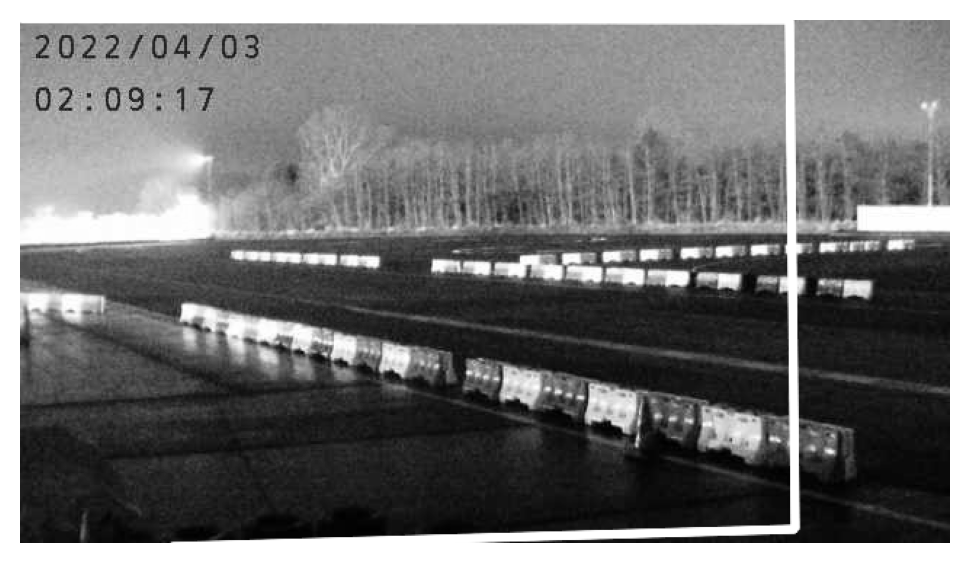

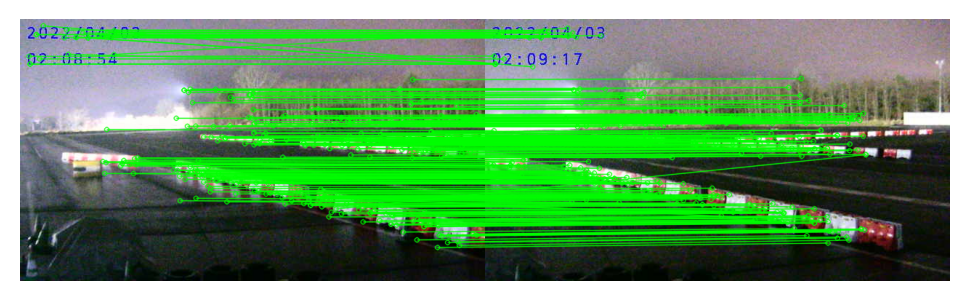

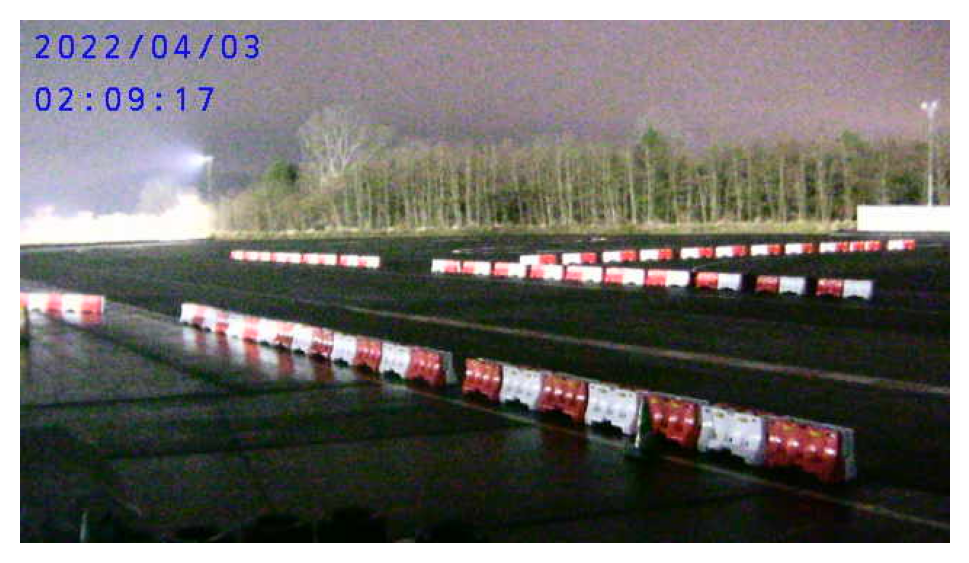

In [10]:
match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)

good = []

for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append(m)

draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)

img3 = cv2.drawMatches(img_, kp1, img, kp2, good,None, **draw_params )

MIN_MATCH_COUNT = 6

print(len(good))

if len(good) > MIN_MATCH_COUNT:
    src_points = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    dst_points = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)
    
    M, mask = cv2.findHomography(src_points,dst_points,cv2.RANSAC, 5.0)
    
    h,w = img1.shape
    pts = np.float32([ [0,0], [0,h-1], [w-1,h-1], [w-1,0] ]).reshape(-1,1,2)
    
    dst = cv2.perspectiveTransform(pts, M)
    
    img2 = cv2.polylines(img2,[np.int32(dst)], True, 255,3, cv2.LINE_AA)
    
    cv2_imshow(img1)
    cv2_imshow(img2)
    cv2_imshow(img3)
else:
    print("Not enough matches are found - &d/%d", (len(good)/MIN_MATCH_COUNT))
    

dst = cv2.warpPerspective(img_,M,(img.shape[1]  +  img_.shape[1],img.shape[0]))
dst[0:img.shape[0], 0:img.shape[1]] = img

cv2_imshow(dst[0:img.shape[0], 0:img.shape[1]])
